<a href="https://colab.research.google.com/github/pritam17/Image-Captioning/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [0]:
from keras.preprocessing import image, sequence
from keras.applications import VGG16
from keras.layers import Dense, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector, Concatenate
from keras.models import Sequential, Model
from keras.optimizers import Nadam

In [22]:
#!wget https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AADbtOap384mNYeFkjZWkOhba/Flicker8k_Dataset?dl=0&subfolder_nav_tracking=1
#!wget https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AADbtOap384mNYeFkjZWkOhba/Flicker8k_Dataset?dl=0
#!unzip /content/Flicker8k_Dataset?dl=0.1
#!mkdir Flicker8k_Images
#!mv *.jpg /content/Flicker8k_Images/
#!rm -rf /content/Flicker8k_Images/*
#!cp /content/Flicker8k_Dataset?dl=0.1 /content/Flicker8k_Images/
#!cd /content/Flicker8k_Images/
#!unzip /content/Flicker8k_Images/Flicker8k_Dataset?dl=0.1
#!mv /content/*.jpg /content/Flicker8k_Images/
#!ls -lrt /content/Flicker8k_Images/* | wc -l
#!wget https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AACUf5EQ7RoX3ZcUzsblbGJla/Flickr8k_text?dl=0
#!mkdir Flickr8k_text
#!unzip /content/Flickr8k_text?dl=0 -d /content/Flickr8k_text

Archive:  /content/Flickr8k_text?dl=0
mapname:  conversion of  failed
 extracting: /content/Flickr8k_text/readme.txt  
 extracting: /content/Flickr8k_text/Flickr8k.token.txt  
 extracting: /content/Flickr8k_text/ExpertAnnotations.txt  
 extracting: /content/Flickr8k_text/Flickr_8k.devImages.txt  
 extracting: /content/Flickr8k_text/Flickr8k.lemma.token.txt  
 extracting: /content/Flickr8k_text/Flickr_8k.testImages.txt  
 extracting: /content/Flickr8k_text/Flickr_8k.trainImages.txt  
 extracting: /content/Flickr8k_text/CrowdFlowerAnnotations.txt  

1 archive had fatal errors.


In [0]:
images_dir = os.listdir("/content/Flicker8k_Images/")

images_path = '/content/Flicker8k_Images/'
captions_path = '/content/Flickr8k_text/Flickr8k.token.txt'
train_path = '/content/Flickr8k_text/Flickr_8k.trainImages.txt'
val_path = '/content/Flickr8k_text/Flickr_8k.devImages.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_test = open(val_path, 'r').read().split("\n")

In [0]:
tokens = {}
temp=[]
for ix in range(len(captions)):
    temp = captions[ix].split("#")
    #print(captions[ix])
    #print(ix)
    #print(temp[0])
    #print(temp[1][2:])
    if temp[0]=='':
        continue
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

In [36]:
"""tokens = {}

for ix in range(len(captions)):
    temp = captions[ix].split("#")
temp[0]

''

In [55]:
"""captions[0].split("#")[1][2:]
temp=captions[0].split("#")
[temp[1][2:]]
temp[0]
tokens[temp[0]] = [temp[1][2:]]
tokens['997722733_0cb5439472.jpg']


['A man in a pink shirt climbs a rock face',
 'A man is rock climbing high in the air .',
 'A person in a red shirt climbing up a rock face covered in assist handles .',
 'A rock climber in a red shirt .',
 'A rock climber practices on a rock climbing wall .']

In [91]:
captions[40460]

''

In [19]:
len(captions)

40461

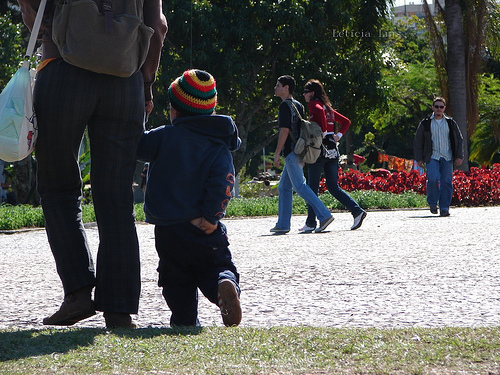

A child walks while holding an adult 's hand .
A man holds a child 's hand as they walk .
A woman walks hand-in-hand with a little boy who looks like he 's pulling out a wedgie
A young boy has his hand in the back of his pants as he walks .
The man is walking with a young child outside .


In [92]:
temp = captions[40000].split("#")
from IPython.display import Image, display
z = Image(filename=images_path+temp[0])
display(z)

for ix in range(len(tokens[temp[0]])):
    print(tokens[temp[0]][ix])

In [94]:
print("Number of Training Images {}".format(len(x_train)))

Number of Training Images 6001


In [0]:
vgg = VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))

In [0]:
def preprocess_input(img):
    img = img[:, :, :, ::-1] #RGB to BGR
    img[:, :, :, 0] -= 103.939 
    img[:, :, :, 1] -= 116.779
    img[:, :, :, 2] -= 123.68
    return img

In [0]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    im = preprocess_input(im)
    return im

In [98]:
x = preprocessing(images_path+temp[0])
print(x.shape)

(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


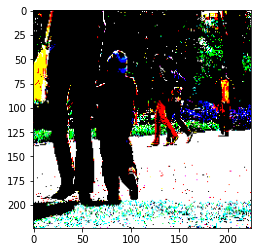

In [99]:
plt.figure(0)
plt.imshow(np.squeeze(x, axis=0))
plt.show()

In [100]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
vgg = Model(inputs=vgg.input, outputs=vgg.layers[-2].output)

In [102]:
vgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# Encoding Images using VGG #

In [0]:
def get_encoding(model, img):
    image = preprocessing(images_path+img)
    pred = model.predict(image)
    pred = np.reshape(pred, pred.shape[1])
    return pred

In [104]:
print(temp[0])

print(get_encoding(vgg, temp[0]).shape)

887108308_2da97f15ef.jpg
(4096,)


In [105]:
train_dataset = open('/content/Flickr8k_text/flickr_8k_train_dataset.txt','w')
train_dataset.write("image_id\tcaptions\n")

val_dataset = open('/content/Flickr8k_text/flickr_8k_val_dataset.txt','w')
val_dataset.write("image_id\tcaptions\n")

18

In [85]:
"""x=0
for img in x_train:
    if img=='':
        print(x)
    x=x+1
len(x_train)

6000


6001

In [106]:
x_train[6000]

''

In [0]:
train_encoded_images = {}

c_train = 0
for img in x_train:
    if img=='':
        continue
    train_encoded_images[img] = get_encoding(vgg, img)
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        train_dataset.write(img+"\t"+caption+"\n")
        train_dataset.flush()
        c_train += 1
train_dataset.close()

In [0]:
with open( "train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(train_encoded_images, pickle_f )

In [0]:
test_encoded_images = {}

c_test = 0
for img in x_test:
    if img=='':
        continue
    test_encoded_images[img] = get_encoding(vgg, img)
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        val_dataset.write(img+"\t"+caption+"\n")
        val_dataset.flush()
        c_test += 1
val_dataset.close()

In [0]:
  
with open( "test_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(test_encoded_images, pickle_f )  

# Building Vocabulary #

In [112]:
pd_dataset = pd.read_csv("/content/Flickr8k_text/flickr_8k_train_dataset.txt", delimiter='\t')
ds = pd_dataset.values
print(ds.shape)

(30000, 2)


In [113]:
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

30000


In [0]:
words = [i.split() for i in sentences]

In [116]:
print(words[0])
len(words)

['<start>', 'A', 'black', 'dog', 'is', 'running', 'after', 'a', 'white', 'dog', 'in', 'the', 'snow', '.', '<end>']


30000

In [0]:
unique = []
for i in words:
    unique.extend(i)

In [119]:
print(unique[:3])

['<start>', 'A', 'black']


In [120]:
len(unique)

413377

In [0]:
unique = list(set(unique))
print(len(unique))

vocab_size = len(unique)

In [0]:
#Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [124]:
print(word_2_indices['<start>'])
print(indices_2_word[4011])

5220
hairdo


In [125]:
max_len = 0

for i in sentences:
    i = i.split()
    if len(i) > max_len:
        max_len = len(i)

print(max_len)

40


# Creating Padded Sequences and Next Words #

In [0]:
padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix, 1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)



In [130]:
print(padded_sequences.shape)
print(subsequent_words.shape)

(30000,)
(30000,)


In [131]:
print(padded_sequences[0])

[[5220    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [5220 7006    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [5220 7006 2137    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [5220 7006 2137  338    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [5220 7006 2137  338 1948    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  

In [132]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print(indices_2_word[padded_sequences[0][ix][iy]],)
    print("\n")

print(len(padded_sequences[0]))

<start>
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips


<start>
A
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips


<start>
A
black
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips


<start>
A
black
dog
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips


<start>
A
black
dog
is
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips
zips


In [0]:
with open('./train_encoded_images.p', 'rb') as f:
        encoded_images = pickle.load(f)

In [134]:
imgs = []

for ix in range(ds.shape[0]):
    imgs.append(encoded_images[ds[ix, 0]])

imgs = np.asarray(imgs)
print(imgs.shape)

(30000, 4096)


In [0]:
number_of_images = 1500 

In [136]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

for ix in range(number_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

np.save("./captions.npy", captions)
np.save("./next_words.npy", next_words)

print(captions.shape)
print(next_words.shape)

(19136, 40)
(19136, 8253)


In [137]:
images = []

for ix in range(number_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("./images.npy", images)

print(images.shape)

(19136, 4096)


In [138]:
image_names = []

for ix in range(number_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("./image_names.npy", image_names)

print(len(image_names))

19136


In [139]:
!hostname


9d07244572a4


In [140]:
!ifconfig


/bin/bash: ifconfig: command not found


In [141]:
!pwd

/content


# New Section